In [58]:
import os
import json
from pprint import pprint
import re
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt


def atoi(text):
    return int(text) if text.isdigit() else text


def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [atoi(c) for c in re.split('(\d+)', text)]


def length_keys(li):
    return len(li)


def all_files_data(dir_name):
    """
    Return a list with json data for all files in dir_name, and a matching list
    with all of the keys for each block of the blocks object in sorted order.
    List looks like:
      {
          'header': {..stuff..},
          'blocks': {
              'block_0': { ..block stuff.. },
              'block_1': { ..block stuff.. },
                ...
                ...
          }
      }
    Keys list is just:
       [   [ 'block_0' ],
           [ 'block_0', 'block_1' ],
              ...
           [ 'block_0', ..., 'block_N' ]
       ]
    """
    skip_list = ['.DS_Store']
    all_files_data_list = []
    all_files = os.listdir(dir_name)
    all_files.sort(key=natural_keys)
    for f in all_files:
        if f not in skip_list:
            with open(dir_name + f) as data_file:
                all_files_data_list.append(json.load(data_file))

    keys_sorted = []
    for d in all_files_data_list:
        sorted_keys = [x for x in d['blocks']]
        sorted_keys.sort(key=natural_keys)
        keys_sorted.append(sorted_keys)

    return all_files_data_list, keys_sorted


def compute_average_of_block_averages(blocks_object):
    """
    Compute the average of all the block averages in blocks_ojbect
    :param blocks_object: JSON object with a bunch of block objects.
    :return: A single average for all the block averages.
    """
    total = 0
    num_blocks = 0
    for b in blocks_object:
        total += blocks_object[b]['avg_val']  # Get the block and add the average value
        num_blocks += 1
    return total / num_blocks


def compute_average_of_all_block_averages_for_all_the_files(all_files_data_list):
    """
    For each file, get the blocks object from all_files_data_list and compute the average of each block.
    :param all_files_data_list:
    :return:
    """
    average_of_average_values = []
    for f in all_files_data_list:
        avg = 0
        blocks_object = f['blocks']  # JSON object for all the blocks in file f.
        avg = compute_average_of_block_averages(blocks_object)
        average_of_average_values.append(avg)

    return average_of_average_values

In [59]:
dir_name = '../json/hop_flower-4096/'
print('Found {} files in {}'.format(len(all_files), dir_name))

all_files_data_list, keys_sorted = all_files_data(dir_name)
average_of_average_values = compute_average_of_all_block_averages_for_all_the_files(all_files_data_list)
average_of_average_values

Found 32 files in ../json/hop_flower-4096/


[0.848073,
 3.9344687499999997,
 4.9023081481481485,
 5.4727759375,
 5.640415200000001,
 6.142390694444443,
 6.286634810495626,
 6.467143183593753,
 6.539290850480106,
 6.587313439999994,
 6.6691165514650645,
 6.709913807870382,
 6.71045092398726,
 6.742234562682212,
 6.739157042962947,
 6.750062080078111,
 6.771295957663355,
 6.77718884773661,
 6.78544749088788,
 6.777653948749987,
 6.781254321347577,
 6.7892221262209,
 6.801830352593093,
 6.807802949218726,
 6.808927260160041,
 6.808018705621307,
 6.815039317685301,
 6.806941880010963,
 6.813073418754374,
 6.817495640740725,
 6.812652592058016,
 6.813777407531729]

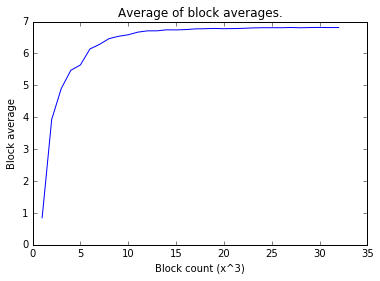

In [60]:
plt.plot(np.arange(1,len(average_of_average_values)+1),average_of_average_values)
plt.title('Average of block averages.')
plt.xlabel('Block count (x^3)')
plt.ylabel('Block average')
plt.show()

Average value of blocks starting with block index (0,0,0) and ending with index (32,32,32)

Mean of avgs: 6.750062080078125, median: 6.520295, Most frequent avg value: 6.3952775


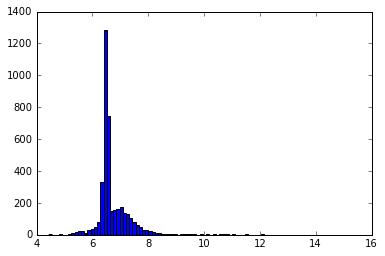

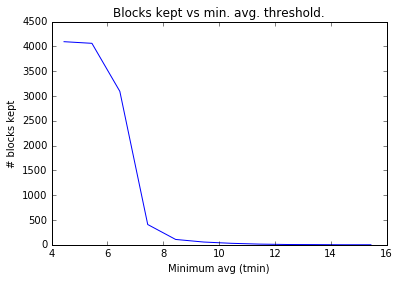

In [61]:
blocks_16_16_16 = all_files_data_list[15]['blocks']
avg_16_16_16_list = [blocks_16_16_16[x]['avg_val'] for x in blocks_16_16_16]
minmin = np.min(avg_16_16_16_list)
maxmax = np.max(avg_16_16_16_list)
tmin = []
kept = []
for t in np.arange(minmin,maxmax):
    tmin.append(t)
    kept.append(len([x for x in avg_16_16_16_list if x > t]))

freq, bins, things = plt.hist(avg_16_16_16_list, bins=100)

print("Mean of avgs: {}, median: {}, Most frequent avg value: {}"
      .format(np.mean(avg_16_16_16_list), np.median(avg_16_16_16_list), bins[np.where(freq == max(freq))][0]))

plt.figure()
plt.plot(tmin, kept)
plt.title('Blocks kept vs min. avg. threshold.')
plt.xlabel('Minimum avg (tmin)')
plt.ylabel('# blocks kept')
plt.show()

Blocks with average value above tmin are kept.

Mean of avgs: 6.813777407531738, median: 6.558005, Most frequent avg value: 6.3989682000000006


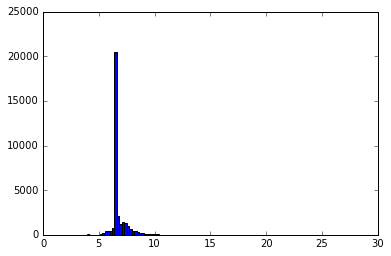

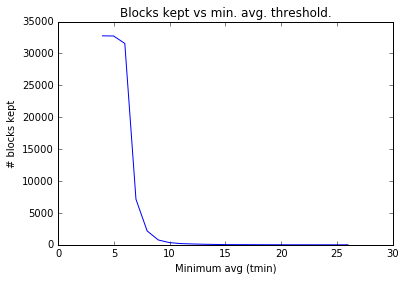

In [62]:
blocks_32_32_32 = all_files_data_list[31]['blocks']
avg_32_32_32_list = [blocks_32_32_32[x]['avg_val'] for x in blocks_32_32_32]
minmin = np.min(avg_32_32_32_list)
maxmax = np.max(avg_32_32_32_list)
tmin = []
kept = []
for t in np.arange(minmin,maxmax):
    tmin.append(t)
    kept.append(len([x for x in avg_32_32_32_list if x > t]))

freq, bins, things = plt.hist(avg_32_32_32_list, bins=100)

print("Mean of avgs: {}, median: {}, Most frequent avg value: {}"
      .format(np.mean(avg_32_32_32_list), np.median(avg_32_32_32_list), bins[np.where(freq == max(freq))][0]))

plt.figure()
plt.plot(tmin, kept)
plt.title('Blocks kept vs min. avg. threshold.')
plt.xlabel('Minimum avg (tmin)')
plt.ylabel('# blocks kept')
plt.show()